In [1]:
import nltk
import string
import re
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

def remove_whitespace(text):
    return  " ".join(text.split())


def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    text = re.sub(r"http\S+", "", text)
    text = re.sub("[^A-Za-z]+", " ", text)
    if remove_stopwords:
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        text = " ".join(tokens)
    text = text.lower().strip()
    return text

In [29]:
title = []
temp =''
readfile = ''
#reading 500 wikipedia articles
for x in range (500):
    #Reading files
    if x <= 9:
        filename ='20140615-wiki-en_00000' + str(x) +'.txt'
    elif x >=10 and x <=99:
        filename ='20140615-wiki-en_0000' + str(x) +'.txt'
    elif x >=100 and x <=999:
        filename ='20140615-wiki-en_000' + str(x) +'.txt'
    elif x >=1000 and x <=9999:
        filename ='20140615-wiki-en_0000' + str(x) +'.txt'    
    with open(filename,'r+',encoding="utf8") as f:
        readfile=str(f.read().replace('\n', ''))
        temp =readfile.split()[0]
        temp=preprocess_text(temp,remove_stopwords=True)
        title.append(temp) 
        
#Preprocessing files
readfile=str(readfile.lower())
readfile=str(remove_stopwords(readfile))
readfile=str(remove_punctuation(readfile))
readfile=str(stem_words(readfile))
readfile=re.sub("[^a-zA-Z]"," ", str(readfile))
readfile=remove_whitespace(readfile)
    

     
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(title)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

print("All titles ->" , title)
print('\n')
for i in range(true_k):
    print("Cluster %d:" % i , end=' '),
    for ind in order_centroids[i, :100]:
        print(' %s' % terms[ind], end=' ' ),
    print('\n')
    print 

All titles -> ['anarchism anarchism', 'allen', 'afonso', 'abiotic', 'alpha', 'brigitte', 'brown', 'bovril bovril', 'economy', 'p', 'comet', 'cuitl huac monument', 'denis', 'dublin', 'foreign', 'eleanor', 'frank', 'fine', 'gnu debian', 'georgius', 'gabbro gabbro', 'honda', 'hsk hsk', 'irreducible', 'international', 'january', 'jule', 'konrad', 'london london', 'lung', 'molybdenum molybdenum', 'minimax minimax', 'marcus', 'michael', 'demographics', 'nullum', 'october', 'physicist isaac', 'patanjali patanjli', 'prime', 'plymouth', 'regular', 'rules', 'slave', 'geography', 'list', 'simultaneity simultaneity', 'sunni', 'economy', 'tram trams', 'torpedo bliss leavitt', 'universalism universalism', 'virgin', 'west', 'william', 'notoc', 'notoc year', 'pope', 'denver', 'world', 'icarus', 'open', 'long haul', 'history', 'trace', '', 'speech', 'panthera panthera', 'hay good', 'zero', 'organisation', 'notoc year', 'dragonflight dragonflight', 'frederick', 'university', 'fountain', 'leonard', '', '

ValueError: 'c' argument has 500 elements, which is inconsistent with 'x' and 'y' with size 1.

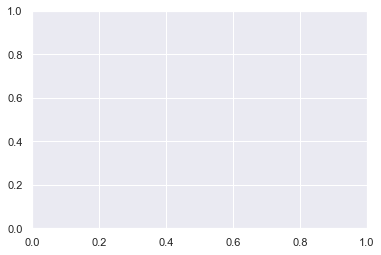

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
plt.scatter(X[:, 0], X[:, 100], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,100], c='black', s=200, alpha=0.5);